In [1]:
!pip install deap

     ------------------------------------ 114.3/114.3 kB 556.5 kB/s eta 0:00:00


In [2]:
#IMPORTAR LIBRERÍAS
import random
import numpy as np
import matplotlib.pyplot as plt

from deap import base, creator, tools, algorithms

import warnings
warnings.filterwarnings('ignore')

In [3]:
#EJERCICIO DE LA MOCHILA
#Definimos pesos y beneficios de los elementos de la mochila y la capacidad de la mochila
beneficios = [20, 25, 20, 20, 35, 40, 35, 30, 35, 25]
pesos = [50, 35, 45, 20, 35, 40, 50, 50, 45, 40]
capacidad = 120

In [4]:
#Declarar el contenedor de operadores genéticos
toolbox = base.Toolbox()

In [5]:
#Creamos una clase para la función de adaptabilidad
creator.create('FitnessMax', base.Fitness, weights = (1.0,))
#Creamos una clase para los individuos
creator.create('Individual', list, fitness = creator.FitnessMax)

In [8]:
#Construir cromosomas booleanos
toolbox.register('attribute', random.randint, 0, 1)
#Determinar la cantidad de genes dentro de un cromosoma (genes = 10)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attribute, n = 10)
#Determinar la población
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [9]:
#Generamos un individuo
ind = toolbox.individual()
print('Individuo: ', ind)

#Generamos una población (6 individuos)
pop = toolbox.population(n = 6)
print('Población: ', pop)

Individuo:  [0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
Población:  [[1, 0, 0, 0, 1, 1, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 1, 1, 1, 0, 0], [0, 1, 0, 0, 1, 0, 1, 1, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]


In [10]:
#Declaramos la función de adaptabilidad 
def evaluarBeneficio(individuo):
    beneficio = 0.0
    peso = 0.0
    
    beneficio = np.dot(individuo, beneficios)
    peso = np.dot(individuo, pesos)
    
    if peso > capacidad:
        beneficio = beneficio - peso
    else:
        beneficio
    return beneficio,

In [12]:
#Instanciar individuo y el valor de adaptabilidad
ind = toolbox.individual()
print('Individuo a evaluar: ', ind)
print(ind.fitness.valid)
ind.fitness.values = evaluarBeneficio(ind)
print(ind.fitness.valid)
print(ind.fitness)

Individuo a evaluar:  [0, 1, 1, 1, 1, 1, 0, 1, 0, 0]
False
True
(-55.0,)


In [13]:
#Declarar los operadores genéticos
#Selección
toolbox.register('select', tools.selTournament, tournsize = 3)
#Cruce
toolbox.register('mate', tools.cxOnePoint)
#Mutación
toolbox.register('mutate', tools.mutFlipBit, indpb = 0.2)

In [14]:
#Declarar la evaluación de adaptabilidad
toolbox.register('evaluate', evaluarBeneficio)

In [15]:
#Configurar estadísticas de análisis
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register('Promedio', np.mean)
stats.register('Desviación', np.std)
stats.register('Mínimo', np.min)
stats.register('Máximo', np.max)

In [16]:
#Implementar el proceso evolutivo
#Inicializar la población
population = toolbox.population(n = 6)

#Implementar el cálculo de las generaciones
population, logbook = algorithms.eaSimple(population, toolbox, cxpb = 0.5, mutpb = 0.2,
                                          ngen = 20, verbose = False, stats = stats)

In [17]:
print('El resultado de la evolución es: ')
print(logbook)

El resultado de la evolución es: 
gen	nevals	Promedio	Desviación	Mínimo	Máximo
0  	6     	-13.3333	64.6572   	-70   	85    
1  	5     	31.6667 	58.2857   	-50   	85    
2  	3     	66.6667 	40.9946   	-25   	85    
3  	6     	85      	0         	85    	85    
4  	5     	79.1667 	13.0437   	50    	85    
5  	5     	40      	63.705    	-55   	85    
6  	5     	35      	70.946    	-75   	85    
7  	0     	85      	0         	85    	85    
8  	5     	22.5    	62.9649   	-50   	85    
9  	4     	21.6667 	64.1396   	-60   	85    
10 	4     	45.8333 	55.559    	-40   	85    
11 	4     	58.3333 	47.4927   	-45   	85    
12 	6     	84.1667 	1.86339   	80    	85    
13 	3     	34.1667 	72.2505   	-80   	85    
14 	2     	40.8333 	62.611    	-55   	85    
15 	5     	63.3333 	48.4481   	-45   	85    
16 	3     	63.3333 	48.4481   	-45   	85    
17 	4     	66.6667 	40.9946   	-25   	85    
18 	4     	85      	0         	85    	85    
19 	5     	57.5    	51.133    	-55   	85    
20 	3     	39.1667 	6

In [19]:
print('La mejor solución es: ')
print(tools.selBest(population, 1)[0])

La mejor solución es: 
[0, 1, 0, 0, 1, 0, 0, 0, 0, 1]


In [20]:
population

[[0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
 [1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 1]]

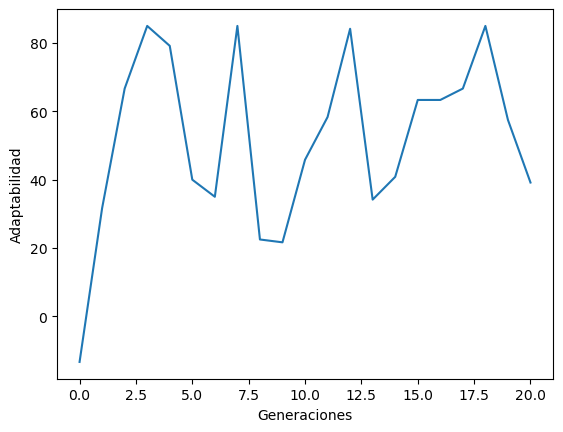

In [21]:
gen = logbook.select('gen')
avgs = logbook.select('Promedio')
plt.plot(gen, avgs)
plt.xlabel('Generaciones')
plt.ylabel('Adaptabilidad')
plt.show()